# Real Estate Market Analysis with Python Project

##### Imports

In [282]:
import pandas as pd
import missingno as msno 
from sklearn.preprocessing import LabelEncoder

In [283]:
customers = pd.read_csv('customers.csv')
properties = pd.read_csv('properties.csv')

In [284]:
customers.head(40)

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
5,5,C0088,Individual,Yurem,Wright,3/6/1957,M,USA,California,Home,3,Yes,Website
6,6,C0079,Individual,Xavier,Faulkner,5/24/1947,M,Canada,NaN,Investment,5,No,Website
7,7,C0149,Individual,Kayden,Olsen,10/17/1969,F,USA,California,Home,5,No,Website
8,8,C0064,Individual,Joaquin,Mullins,10/5/1975,M,USA,California,Investment,5,No,Agency
9,9,C0068,Individual,Nicolas,Navarro,6/17/1966,M,USA,Oregon,Investment,3,No,Agency


In [285]:
print(customers.columns)


Index(['Unnamed: 0', '﻿customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')


In [286]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         162 non-null    int64 
 1   ﻿customerid        162 non-null    object
 2   entity             162 non-null    object
 3   name               162 non-null    object
 4   surname            162 non-null    object
 5   birth_date         155 non-null    object
 6   sex                155 non-null    object
 7   country            162 non-null    object
 8   state              154 non-null    object
 9   purpose            162 non-null    object
 10  deal_satisfaction  162 non-null    int64 
 11  mortgage           162 non-null    object
 12  source             162 non-null    object
dtypes: int64(2), object(11)
memory usage: 16.6+ KB


In [287]:
customers.describe()

,Unnamed: 0,deal_satisfaction
count,162.000000,162.000000
mean,80.500000,3.456790
std,46.909487,1.333276
min,0.000000,1.000000
25%,40.250000,3.000000
50%,80.500000,4.000000
75%,120.750000,5.000000
max,161.000000,5.000000


In [288]:
customers.shape

(162, 13)

### Data Preparation

### Checking Datatypes

In [289]:
print(customers.columns)

Index(['Unnamed: 0', '﻿customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')


In [290]:
customers.dtypes

Unnamed: 0            int64
﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [291]:
customers.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [292]:
customers['﻿customerid'] = customers['﻿customerid'].str.replace('C', '')

In [293]:
# Convert the data types of the columns to their appropriate types 'strings'
customers['﻿customerid'] = customers['﻿customerid'].astype('int64')
customers['name'] = customers['name'].astype('string')
customers['surname'] = customers['surname'].astype('string')
customers['entity'] = customers['entity'].astype('string')
customers['sex'] = customers['sex'].astype('string')
customers['country'] = customers['country'].astype('string')
customers['state'] = customers['state'].astype('string')
customers['purpose'] = customers['purpose'].astype('string')
customers['mortgage'] = customers['mortgage'].astype('string')
customers['source'] = customers['source'].astype('string')

In [294]:
# Convert the data types of the columns to their appropriate types 'date'
customers['birth_date'] = customers['birth_date'].astype('datetime64[ns]')

In [295]:
customers.dtypes

customerid                   int64
entity               string[python]
name                 string[python]
surname              string[python]
birth_date           datetime64[ns]
sex                  string[python]
country              string[python]
state                string[python]
purpose              string[python]
deal_satisfaction             int64
mortgage             string[python]
source               string[python]
dtype: object

### Column names

In [296]:
# rename columns
customers.rename(columns={'﻿customerid': 'customerid'}, inplace=True)
customers.rename(columns={'birth_date':'birthdate'}, inplace=True)

### Categorical to numerical

### Case: If there are inconsistencies with Capitol and lowercases, unify them using the lowercase convention.


using the lowercase method

In [297]:
categorical_cols = ['entity',  'sex', 'country', 'state',
       'purpose', 'mortgage', 'source']

In [298]:
for col in categorical_cols:
  customers[col] = customers[col].str.lower()

In [299]:
# using label encoder to encode categorical columns
label_encoder = LabelEncoder()

##### we have first to check the unoque values of each column

##### 1 - Entity column

In [300]:
print(customers['entity'].unique())

<StringArray>
['individual', 'company']
Length: 2, dtype: string


In [301]:
customers['entity'] = label_encoder.fit_transform(customers['entity'])
print(customers['entity'].unique())

[1 0]


2 - Sex column

In [302]:
print(customers['sex'].unique())

<StringArray>
['f', 'm', <NA>]
Length: 3, dtype: string


##### Imputation of NA values

In [303]:
customers['sex'].fillna('Unknown', inplace=True)

In [304]:
customers['sex'] = label_encoder.fit_transform(customers['sex'])
print(customers['sex'].unique())

[1 2 0]


3 - country column

1.   Remove leading and trailing whitespace from all values in the 'country' column.
2.   Convert all values to lowercase to ensure uniform capitalization.


In [305]:
customers['country'] = customers['country'].str.strip().str.lower()

In [306]:
print(customers['country'].unique())

<StringArray>
['usa', 'canada', 'germany', 'belgium', 'mexico', 'russia', 'uk', 'denmark']
Length: 8, dtype: string


In [307]:
customers['country'] = label_encoder.fit_transform(customers['country'])
print(customers['country'].unique())

[7 1 3 0 4 5 6 2]


In [308]:
customers['country'].iloc[0]

7

4 - state column

In [309]:
print(customers['state'].unique())

<StringArray>
['california',         <NA>,     'oregon',    'arizona',     'nevada',
   'colorado',       'utah',   'virginia',    'wyoming',     'kansas']
Length: 10, dtype: string


##### Imputation of NA values

In [310]:
customers['state'].fillna('unknown',inplace=True)

In [311]:
customers['state'] = label_encoder.fit_transform(customers['state'])
print(customers['state'].unique())

[1 6 5 0 4 2 7 8 9 3]


5 - purpose column

In [312]:
print(customers['purpose'].unique())

<StringArray>
['home', 'investment']
Length: 2, dtype: string


In [313]:
customers['purpose'] = label_encoder.fit_transform(customers['purpose'])
print(customers['purpose'].unique())

[0 1]


6 - mortgage column

In [314]:
print(customers['mortgage'].unique())

<StringArray>
['yes', 'no']
Length: 2, dtype: string


In [315]:
customers['mortgage'] = label_encoder.fit_transform(customers['mortgage'])
print(customers['mortgage'].unique())

[1 0]


7 - source column

In [316]:
print(customers['source'].unique())

<StringArray>
['website', 'agency', 'client']
Length: 3, dtype: string


In [317]:
customers['source'] = label_encoder.fit_transform(customers['source'])
print(customers['source'].unique())

[2 0 1]


8 - customerid

In [318]:
customers['customerid'].unique()

array([110,  10, 132, 137, 174,  88,  79, 149,  64,  68,   6,  55,  16,
       121,  74,  32,  93,  76, 165, 153, 129, 162,  71,  69,   5, 144,
        20, 101, 128,  33, 171,  95, 123,  15,  84,  19,  53,  80,  70,
        51,  22, 127,  81, 104,  73, 168, 169,  39,  86,  36,  45, 105,
       119,  12,  65,  54, 172,  29,  98, 142, 135,  37, 134,  91,  18,
        85,  61,  66, 156,  43, 112, 145,  47,  82,   7,  52,  41,   4,
       118,  30, 154, 125, 115,  78, 151, 111,  14, 103,  24, 166,  67,
       122, 107,   3,  99, 160,  13,  59, 120, 150, 140,   2,  96, 159,
       163, 100, 155,  49, 148, 146,  34, 141,   8, 131,  89, 157, 114,
       124, 158, 175,  23, 164,  58,  62,  42,  48,  83,  25,  87,  94,
        38,  11, 139,  21, 106,  40,  35, 126, 136, 109,  28,  57, 130,
        44,  56,  77,  31,  72,  63,  17,   9,  75,  27,  60,   1,  90,
       108, 170, 138, 113, 147, 133])

In [319]:
properties_ids = [' 0028 ', ' 0027 ', ' 0112 ', ' 0160 ', ' 0014 ', ' 0125 ',
       ' 0166 ', ' 0034 ', ' 0170 ', ' 0009 ', ' 0041 ', ' 0057 ',
       ' 0061 ', ' 0089 ', ' 0159 ', ' 0171 ', ' 0042 ', ' 0093 ',
       ' 0051 ', ' 0064 ', ' 0128 ', ' 0019 ', ' 0037 ', ' 0127 ',
       ' 0018 ', ' 0040 ', ' 0080 ', ' 0083 ', ' 0085 ', ' 0091 ',
       ' 0007 ', ' 0048 ', ' 0065 ', ' 0096 ', ' 0164 ', ' 0038 ',
       ' 0087 ', ' 0142 ', ' 0015 ', ' 0122 ', ' 0017 ', ' 0020 ',
       ' 0086 ', ' 0150 ', ' 0156 ', ' 0169 ', ' 0022 ', ' 0072 ',
       ' 0136 ', ' 0149 ', ' 0011 ', ' 0073 ', ' 0110 ', ' 0111 ',
       ' 0123 ', ' 0070 ', ' 0075 ', ' 0076 ', ' 0105 ', ' 0135 ',
       ' 0153 ', ' 0047 ', ' 0060 ', ' 0066 ', ' 0068 ', ' 0090 ',
       ' 0095 ', ' 0151 ', ' 0162 ', ' 0010 ', ' 0054 ', ' 0056 ',
       ' 0081 ', ' 0084 ', ' 0016 ', ' 0035 ', ' 0062 ', ' 0099 ',
       ' 0114 ', ' 0006 ', ' 0053 ', ' 0069 ', ' 0077 ', ' 0168 ',
       ' 0058 ', ' 0107 ', ' 0131 ', ' 0144 ', ' 0098 ', ' 0130 ',
       ' 0141 ', ' 0067 ', ' 0082 ', ' 0113 ', ' 0132 ', ' 0137 ',
       ' 0155 ', ' 0163 ', ' 0039 ', ' 0071 ', ' 0101 ', ' 0146 ',
       ' 0052 ', ' 0063 ', ' 0088 ', ' 0094 ', ' 0165 ', ' 0044 ',
       ' 0157 ', ' 0118 ', ' 0119 ', ' 0033 ', ' 0100 ', ' 0133 ',
       ' 0175 ', ' 0008 ', ' 0023 ', ' 0108 ', ' 0109 ', ' 0145 ',
       ' 0003 ', ' 0004 ', ' 0024 ', ' 0030 ', ' 0147 ', ' 0002 ',
       ' 0031 ', ' 0059 ', ' 0140 ', ' 0043 ', ' 0078 ', ' 0124 ',
       ' 0049 ', ' 0079 ', ' 0013 ', ' 0139 ', ' 0154 ', ' 0045 ',
       ' 0134 ', ' 0138 ', ' 0158 ', ' 0036 ', ' 0074 ', ' 0120 ',
       ' 0005 ', ' 0032 ', ' 0126 ', ' 0106 ', ' 0115 ', ' 0129 ',
       ' 0103 ', ' 0021 ', ' 0148 ', ' 0172 ', ' 0104 ', ' 0001 ',
       ' 0012 ', ' 0025 ', ' 0029 ', ' 0055 ', ' 0121 ', ' 0174 ']
properties_ids = [int(property_id.strip()) for property_id in properties_ids]

In [320]:
customer_ids =[110,  10, 132, 137, 174,  88,  79, 149,  64,  68,   6,  55,  16,
       121,  74,  32,  93,  76, 165, 153, 129, 162,  71,  69,   5, 144,
        20, 101, 128,  33, 171,  95, 123,  15,  84,  19,  53,  80,  70,
        51,  22, 127,  81, 104,  73, 168, 169,  39,  86,  36,  45, 105,
       119,  12,  65,  54, 172,  29,  98, 142, 135,  37, 134,  91,  18,
        85,  61,  66, 156,  43, 112, 145,  47,  82,   7,  52,  41,   4,
       118,  30, 154, 125, 115,  78, 151, 111,  14, 103,  24, 166,  67,
       122, 107,   3,  99, 160,  13,  59, 120, 150, 140,   2,  96, 159,
       163, 100, 155,  49, 148, 146,  34, 141,   8, 131,  89, 157, 114,
       124, 158, 175,  23, 164,  58,  62,  42,  48,  83,  25,  87,  94,
        38,  11, 139,  21, 106,  40,  35, 126, 136, 109,  28,  57, 130,
        44,  56,  77,  31,  72,  63,  17,   9,  75,  27,  60,   1,  90,
       108, 170, 138, 113, 147, 133]

In [321]:
# Subtract list2 from list1
result = [x for x in customer_ids if x not in properties]

print(result)

[110, 10, 132, 137, 174, 88, 79, 149, 64, 68, 6, 55, 16, 121, 74, 32, 93, 76, 165, 153, 129, 162, 71, 69, 5, 144, 20, 101, 128, 33, 171, 95, 123, 15, 84, 19, 53, 80, 70, 51, 22, 127, 81, 104, 73, 168, 169, 39, 86, 36, 45, 105, 119, 12, 65, 54, 172, 29, 98, 142, 135, 37, 134, 91, 18, 85, 61, 66, 156, 43, 112, 145, 47, 82, 7, 52, 41, 4, 118, 30, 154, 125, 115, 78, 151, 111, 14, 103, 24, 166, 67, 122, 107, 3, 99, 160, 13, 59, 120, 150, 140, 2, 96, 159, 163, 100, 155, 49, 148, 146, 34, 141, 8, 131, 89, 157, 114, 124, 158, 175, 23, 164, 58, 62, 42, 48, 83, 25, 87, 94, 38, 11, 139, 21, 106, 40, 35, 126, 136, 109, 28, 57, 130, 44, 56, 77, 31, 72, 63, 17, 9, 75, 27, 60, 1, 90, 108, 170, 138, 113, 147, 133]


In [322]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerid         162 non-null    int64         
 1   entity             162 non-null    int64         
 2   name               162 non-null    string        
 3   surname            162 non-null    string        
 4   birthdate          155 non-null    datetime64[ns]
 5   sex                162 non-null    int64         
 6   country            162 non-null    int64         
 7   state              162 non-null    int64         
 8   purpose            162 non-null    int64         
 9   deal_satisfaction  162 non-null    int64         
 10  mortgage           162 non-null    int64         
 11  source             162 non-null    int64         
dtypes: datetime64[ns](1), int64(9), string(2)
memory usage: 15.3 KB


In [323]:
customers.head()

,customerid,entity,name,surname,birthdate,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,1,Kareem,Liu,1968-05-11,1,7,1,0,4,1,2
1,10,1,Trystan,Oconnor,1962-11-26,2,7,1,0,1,0,2
2,132,1,Kale,Gay,1959-04-07,2,7,1,0,4,1,0
3,137,1,Russell,Gross,1959-11-25,2,7,1,0,5,0,2
4,174,0,Marleez,Co,NaT,0,7,1,1,5,0,2


In [324]:
# For customers dataframe
customers.isnull().sum()

customerid           0
entity               0
name                 0
surname              0
birthdate            7
sex                  0
country              0
state                0
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [325]:
missing_percentage = (customers.isnull().mean() * 100).round(2)
print(missing_percentage)

customerid           0.00
entity               0.00
name                 0.00
surname              0.00
birthdate            4.32
sex                  0.00
country              0.00
state                0.00
purpose              0.00
deal_satisfaction    0.00
mortgage             0.00
source               0.00
dtype: float64


#### Using missingno package

<Axes: >

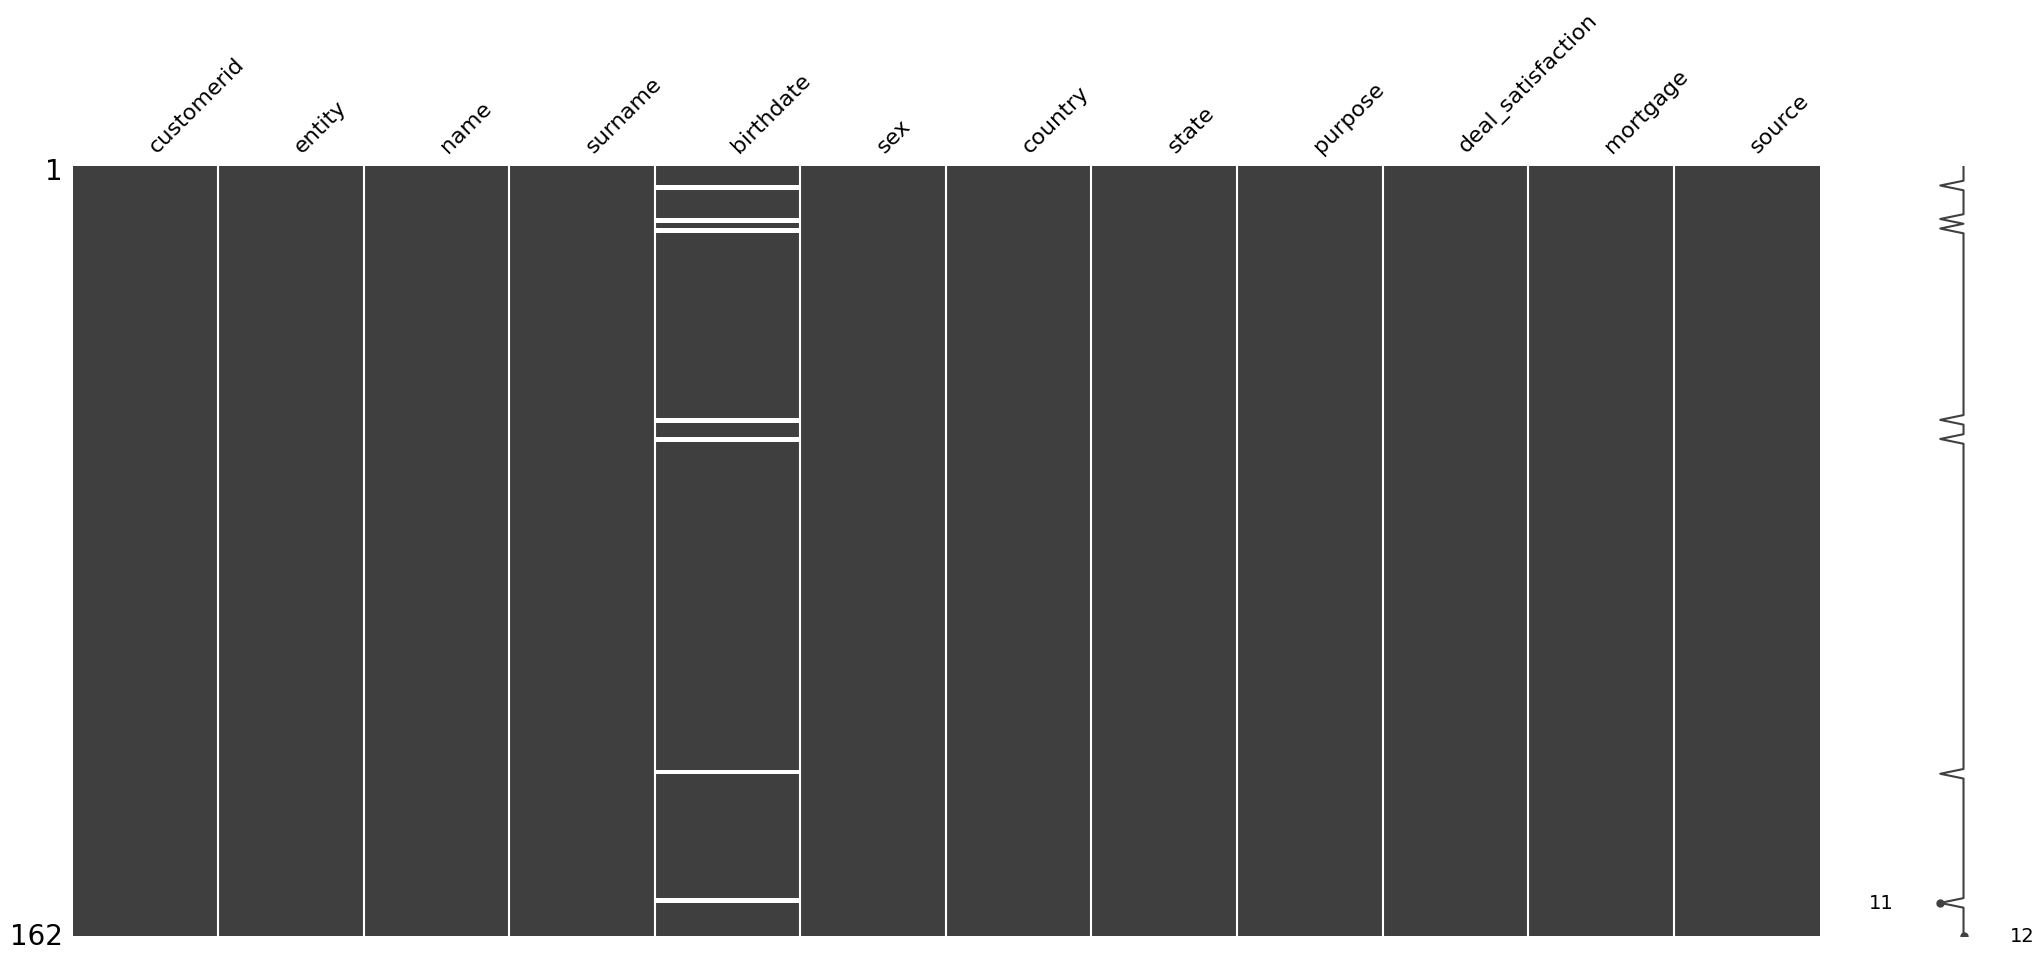

In [326]:
msno.matrix(customers)

##### Impute the birthdate column using the ffill method

In [327]:
customers.sort_values(by='birthdate', inplace=True)
customers['birthdate'].fillna(method='ffill', inplace=True)

In [328]:
customers.shape

(162, 12)

In [329]:
customers.head()

,customerid,entity,name,surname,birthdate,sex,country,state,purpose,deal_satisfaction,mortgage,source
43,104,1,Diana,Hunt,1931-02-13,1,7,0,0,3,0,2
133,21,1,Kaylin,Villarreal,1932-06-13,1,5,6,1,3,0,2
108,148,1,Myah,Roman,1933-05-05,1,7,1,1,5,1,0
56,172,1,Henry,Kennedy,1933-06-08,2,7,1,0,4,1,0
87,103,1,Jamal,Mueller,1936-08-13,2,7,5,1,2,0,2


## Properties Dataset Cleaning and Preprocessing

In [330]:
properties.head()

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [331]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  267 non-null    int64  
 1   ﻿id         267 non-null    int64  
 2   building    267 non-null    int64  
 3   date_sale   267 non-null    object 
 4   type        267 non-null    object 
 5   property#   267 non-null    int64  
 6   area        267 non-null    float64
 7   price       267 non-null    object 
 8   status      267 non-null    object 
 9   customerid  195 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 21.0+ KB


In [332]:
print(properties.columns)

Index(['Unnamed: 0', '﻿id', 'building', 'date_sale', 'type', 'property#',
       'area', 'price', 'status', 'customerid'],
      dtype='object')


In [333]:
properties.describe()

,Unnamed: 0,﻿id,building,property#,area
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,133.000000,2975.142322,2.947566,27.580524,936.221311
std,77.220464,1392.197474,1.391794,15.361437,284.894858
min,0.000000,1002.000000,1.000000,1.000000,410.710000
25%,66.500000,2015.500000,2.000000,14.500000,756.210000
50%,133.000000,3024.000000,3.000000,28.000000,798.280000
75%,199.500000,4031.500000,4.000000,40.000000,1121.950000
max,266.000000,5052.000000,5.000000,59.000000,1942.500000


In [334]:
properties.shape

(267, 10)

### Data preparation 

In [335]:
properties['customerid'] = properties['customerid'].str.replace('C', '')

In [336]:
properties.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
properties.drop(columns=['﻿id'], inplace=True)

### Data dtypes

In [337]:
properties.dtypes

building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [338]:
properties['customerid'].unique()

array([' 0028 ', ' 0027 ', ' 0112 ', ' 0160 ', ' 0014 ', ' 0125 ',
       ' 0166 ', ' 0034 ', ' 0170 ', ' 0009 ', ' 0041 ', ' 0057 ',
       ' 0061 ', ' 0089 ', ' 0159 ', ' 0171 ', ' 0042 ', ' 0093 ',
       ' 0051 ', ' 0064 ', ' 0128 ', ' 0019 ', ' 0037 ', ' 0127 ',
       ' 0018 ', ' 0040 ', ' 0080 ', ' 0083 ', ' 0085 ', ' 0091 ',
       ' 0007 ', ' 0048 ', ' 0065 ', ' 0096 ', ' 0164 ', ' 0038 ',
       ' 0087 ', ' 0142 ', ' 0015 ', ' 0122 ', ' 0017 ', ' 0020 ',
       ' 0086 ', ' 0150 ', ' 0156 ', ' 0169 ', ' 0022 ', ' 0072 ',
       ' 0136 ', ' 0149 ', ' 0011 ', ' 0073 ', ' 0110 ', ' 0111 ',
       ' 0123 ', ' 0070 ', ' 0075 ', ' 0076 ', ' 0105 ', ' 0135 ',
       ' 0153 ', ' 0047 ', ' 0060 ', ' 0066 ', ' 0068 ', ' 0090 ',
       ' 0095 ', ' 0151 ', ' 0162 ', ' 0010 ', ' 0054 ', ' 0056 ',
       ' 0081 ', ' 0084 ', ' 0016 ', ' 0035 ', ' 0062 ', ' 0099 ',
       ' 0114 ', ' 0006 ', ' 0053 ', ' 0069 ', ' 0077 ', ' 0168 ',
       ' 0058 ', ' 0107 ', ' 0131 ', ' 0144 ', ' 0098 ', ' 013

In [339]:
# Remove leading and trailing spaces and any non-numeric characters
properties['customerid'] = properties['customerid'].str.replace(r'\D', '', regex=True)
properties['customerid'] = properties['customerid'].astype(float).astype('Int64')  # Convert to Nullable Integer


In [340]:
# Define the list of possible imputation values
impute_values = [110, 10, 132, 137, 174, 88, 79, 149, 64, 68, 6, 55, 16, 121, 74, 32, 93, 76, 165, 153, 129, 162, 71, 69, 5, 144, 20, 101, 128, 33, 171, 95, 123, 15, 84, 19, 53, 80, 70, 51, 22, 127, 81, 104, 73, 168, 169, 39, 86, 36, 45, 105, 119, 12, 65, 54, 172, 29, 98, 142, 135, 37, 134, 91, 18, 85, 61, 66, 156, 43, 112, 145, 47, 82, 7, 52, 41, 4, 118, 30, 154, 125, 115, 78, 151, 111, 14, 103, 24, 166, 67, 122, 107, 3, 99, 160, 13, 59, 120, 150, 140, 2, 96, 159, 163, 100, 155, 49, 148, 146, 34, 141, 8, 131, 89, 157, 114, 124, 158, 175, 23, 164, 58, 62, 42, 48, 83, 25, 87, 94, 38, 11, 139, 21, 106, 40, 35, 126, 136, 109, 28, 57, 130, 44, 56, 77, 31, 72, 63, 17, 9, 75, 27, 60, 1, 90, 108, 170, 138, 113, 147, 133]

# Iterate through the DataFrame to replace NaN values
for value in impute_values:
    properties['customerid'].fillna(value=value, inplace=True)

# If there are still NaN values left, you can fill them with a default value, for example, -1
properties['customerid'].fillna(value=-1, inplace=True)

In [341]:
properties['customerid'].unique()

<IntegerArray>
[ 28,  27, 112, 160,  14, 125, 166,  34, 170,   9,
 ...
 148, 172, 104,   1,  12,  25,  29,  55, 121, 174]
Length: 162, dtype: Int64

In [342]:
properties['type'] = properties['type'].astype('string')
properties['status'] = properties['status'].astype('string')

Note : The errors='coerce' parameter will convert invalid dates to NaT (Not a Timestamp), which represents missing values.

In [343]:
properties['date_sale'] = pd.to_datetime(properties['date_sale'], format='%m/%d/%Y', errors='coerce')

In [344]:
properties['price'] = properties['price'].str.replace('$','').str.replace(',','').astype('float64')

##### Rename Property column

In [345]:
properties.rename(columns={'property#':'property','date_sale':'datesale'},inplace=True )


In [346]:
properties.head(10)

,building,datesale,type,property,area,price,status,customerid
0,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,28
1,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,27
2,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,112
3,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,160
4,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,14
5,3,2007-09-01,Apartment,11,675.19,203491.85,Sold,125
6,3,2007-09-01,Apartment,26,670.89,212520.83,Sold,125
7,3,2008-01-01,Apartment,23,720.81,198591.85,Sold,166
8,1,2006-06-01,Apartment,31,782.25,265467.68,Sold,34
9,4,2006-03-01,Apartment,23,794.52,235633.26,Sold,170


In [347]:
properties.dtypes

building               int64
datesale      datetime64[ns]
type          string[python]
property               int64
area                 float64
price                float64
status        string[python]
customerid             Int64
dtype: object

In [348]:
categorical_cols = ['status', 'type']

1 - status column

In [349]:
properties['status'] = properties['status'].str.lower()

In [350]:
properties['status'].unique()

<StringArray>
[' sold ', '-']
Length: 2, dtype: string

In [351]:
properties['status'] = properties['status'].replace('-', 'unknown')

In [352]:
properties['status'] = label_encoder.fit_transform(properties['status'])

In [353]:
properties['status'].unique()

array([0, 1])

2 - type column

In [354]:
properties['type'] = properties['type'].str.lower()

In [355]:
properties['type'].unique()

<StringArray>
['apartment', 'office']
Length: 2, dtype: string

In [356]:
properties['type'] = label_encoder.fit_transform(properties['type'])

In [357]:
properties.head(10)

,building,datesale,type,property,area,price,status,customerid
0,1,2005-11-01,0,30,743.09,246172.68,0,28
1,1,2005-10-01,0,29,756.21,246331.90,0,27
2,2,2007-07-01,0,2,587.28,209280.91,0,112
3,2,2007-12-01,0,31,1604.75,452667.01,0,160
4,1,2004-11-01,0,49,1375.45,467083.31,0,14
5,3,2007-09-01,0,11,675.19,203491.85,0,125
6,3,2007-09-01,0,26,670.89,212520.83,0,125
7,3,2008-01-01,0,23,720.81,198591.85,0,166
8,1,2006-06-01,0,31,782.25,265467.68,0,34
9,4,2006-03-01,0,23,794.52,235633.26,0,170


#### Missing values

In [358]:
properties.isna().sum()

building       0
datesale      72
type           0
property       0
area           0
price          0
status         0
customerid     0
dtype: int64

<Axes: >

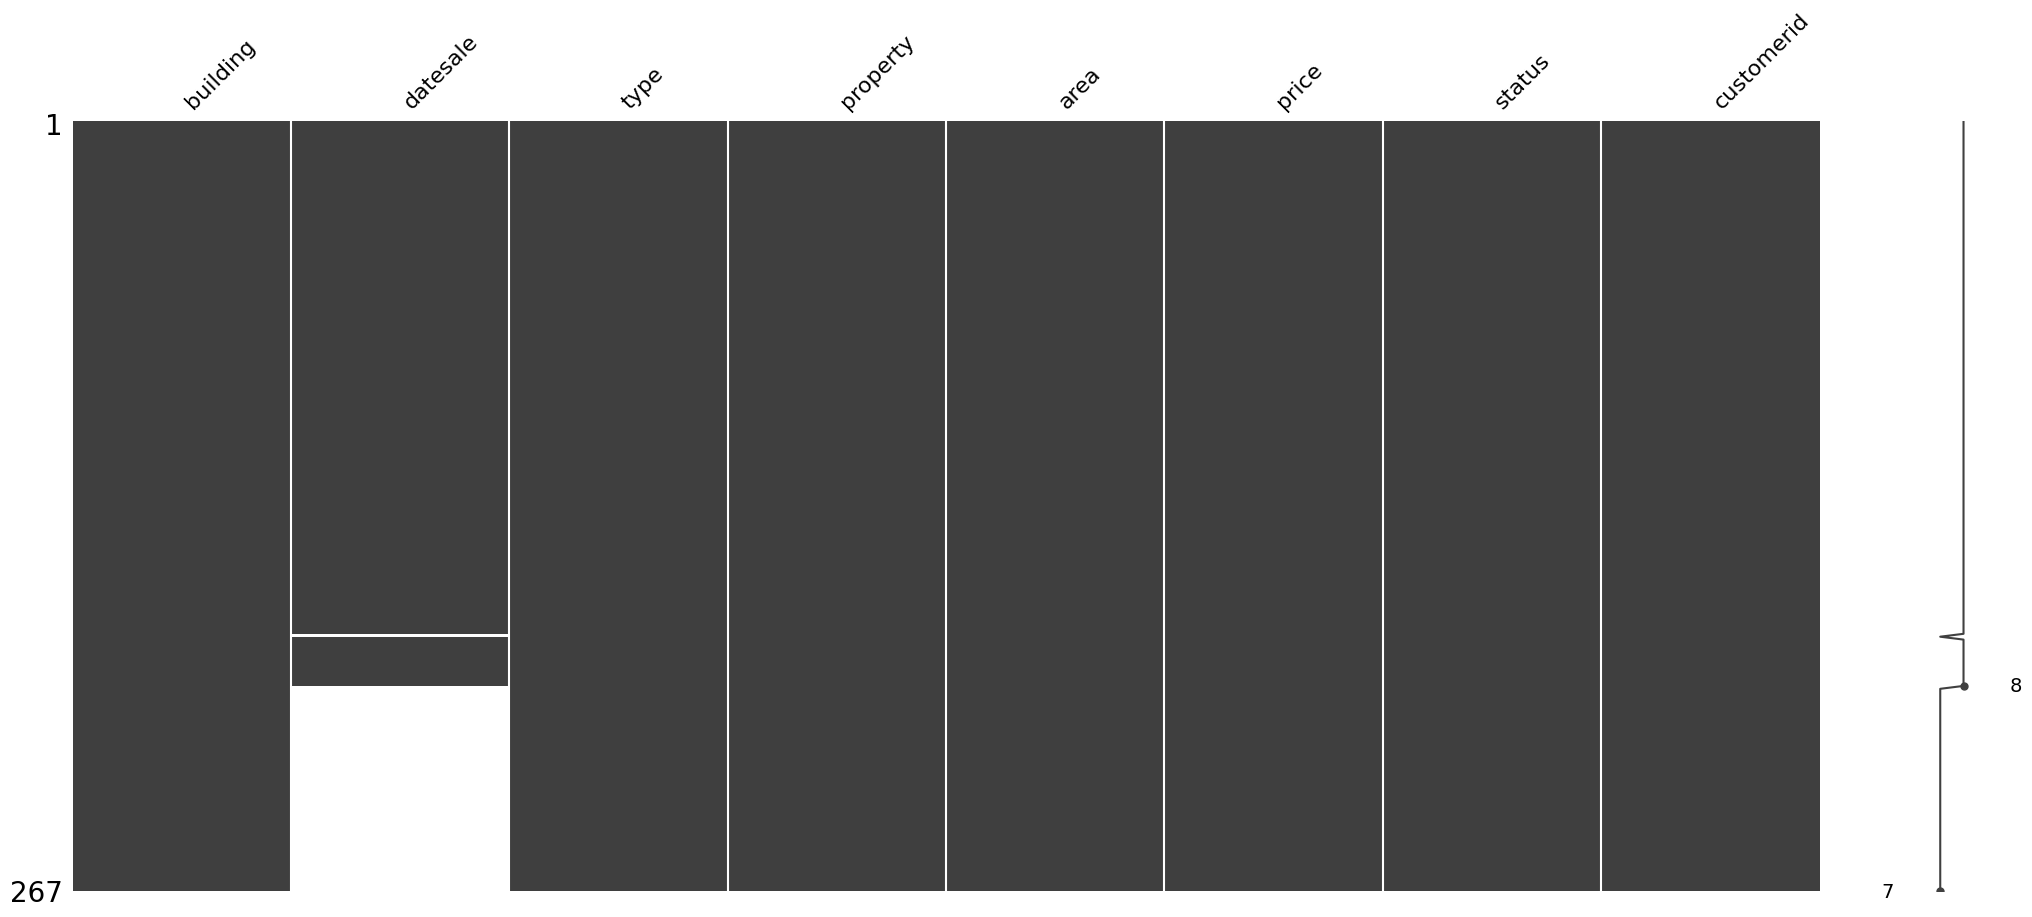

In [359]:
msno.matrix(properties)

In [360]:
missing_values = ((properties.isna().sum() * 100)/ properties.shape[0]).round()

In [361]:
print(missing_values)

building       0.0
datesale      27.0
type           0.0
property       0.0
area           0.0
price          0.0
status         0.0
customerid     0.0
dtype: float64


##### Datesale column missing values

In [362]:
properties.sort_values(by='datesale', inplace=True)

In [363]:
properties['datesale'].fillna(method='ffill', inplace=True)

Note : 
* Forward-Fill (ffill): This method fills missing values with the previous (above) non-missing value in the same column. It's particularly useful when dealing with time series data or ordered data where the sequence matters.

In [364]:
properties.head(10)

,building,datesale,type,property,area,price,status,customerid
137,1,2004-03-01,1,2,1238.58,410932.67,0,2
186,2,2004-03-01,0,1,587.28,169158.29,0,121
179,1,2004-03-01,1,5,410.71,117564.07,0,1
132,1,2004-06-01,0,44,827.87,229464.71,0,3
133,1,2004-06-01,0,43,1160.36,377313.56,0,4
83,1,2004-08-01,0,38,743.09,207581.43,0,6
164,1,2004-08-01,0,33,1434.09,412856.56,0,5
33,1,2004-10-01,0,18,625.80,191389.87,0,7
53,1,2004-10-01,0,35,827.87,238811.06,0,11
72,1,2004-10-01,0,45,756.21,248525.12,0,10


##### Customerid column missing values

In [365]:
properties.isna().sum()

building      0
datesale      0
type          0
property      0
area          0
price         0
status        0
customerid    0
dtype: int64

In [366]:
properties['customerid']

137      2
186    121
179      1
132      3
133      4
      ... 
262    110
263    110
264    110
265    110
266    110
Name: customerid, Length: 267, dtype: Int64

In [367]:
# Assuming 'customers' and 'properties' are your DataFrames
common_customer_ids = set(customers['customerid']).intersection(properties['customerid'])

if common_customer_ids:
    print("Common customer IDs found:")
    print(common_customer_ids)
else:
    print("No common customer IDs found.")


Common customer IDs found:
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 174, 175}


### Merging the two datasets

* Right Join: Similar to the left join but returns all rows from the right dataset and the matching rows from the left dataset.

In [368]:
data  = customers.merge(properties, on='customerid', how='outer')

In [369]:
data.shape

(267, 19)

In [370]:
data.head(20)

,customerid,entity,name,surname,birthdate,sex,country,state,purpose,deal_satisfaction,mortgage,source,building,datesale,type,property,area,price,status
0,104,1,Diana,Hunt,1931-02-13,1,7,0,0,3,0,2,3,2007-06-01,0,25,923.21,296483.14,0
1,21,1,Kaylin,Villarreal,1932-06-13,1,5,6,1,3,0,2,1,2005-04-01,0,23,782.25,261579.89,0
2,148,1,Myah,Roman,1933-05-05,1,7,1,1,5,1,0,3,2006-05-01,0,9,743.41,222867.42,0
3,172,1,Henry,Kennedy,1933-06-08,2,7,1,0,4,1,0,3,2006-03-01,0,52,923.21,291494.36,0
4,103,1,Jamal,Mueller,1936-08-13,2,7,5,1,2,0,2,3,2007-06-01,0,40,670.89,204292.49,0
5,103,1,Jamal,Mueller,1936-08-13,2,7,5,1,2,0,2,3,2007-06-01,0,8,697.89,219865.76,0
6,5,1,Rodolfo,Gibson,1937-01-20,2,7,4,0,2,1,2,1,2004-08-01,0,33,1434.09,412856.56,0
7,129,1,Jesus,Obrien,1938-06-09,2,7,5,1,3,0,2,3,2007-10-01,0,48,781.07,249075.66,0
8,129,1,Jesus,Obrien,1938-06-09,2,7,5,1,3,0,2,3,2007-10-01,0,12,781.07,210824.06,0
9,115,1,Issac,Edwards,1938-10-29,2,7,1,0,5,0,2,3,2007-08-01,0,2,923.21,261871.70,0


In [371]:
print(((data.isna().sum()) * 100 / data.shape[0]).round(2))

customerid           0.0
entity               0.0
name                 0.0
surname              0.0
birthdate            0.0
sex                  0.0
country              0.0
state                0.0
purpose              0.0
deal_satisfaction    0.0
mortgage             0.0
source               0.0
building             0.0
datesale             0.0
type                 0.0
property             0.0
area                 0.0
price                0.0
status               0.0
dtype: float64


In [372]:
data.dtypes

customerid                    int64
entity                        int64
name                 string[python]
surname              string[python]
birthdate            datetime64[ns]
sex                           int64
country                       int64
state                         int64
purpose                       int64
deal_satisfaction             int64
mortgage                      int64
source                        int64
building                      int64
datesale             datetime64[ns]
type                          int64
property                      int64
area                        float64
price                       float64
status                        int64
dtype: object

In [373]:
# Assume df is your DataFrame

# Define a dictionary to specify data types for each column
dtypes_dict = {
    'customerid': 'int64',
    'entity': 'int64',
    'name': 'string',
    'surname': 'string',
    'birthdate': 'datetime64',
    'sex': 'int64',
    'country': 'int64',
    'state': 'int64',
    'purpose': 'int64',
    'deal_satisfaction': 'int64',
    'mortgage': 'int64',
    'source': 'int64',
    'building': 'int64',
    'datesale': 'datetime64',
    'type': 'int64',
    'property': 'int64',
    'area': 'float64',
    'price': 'float64',
    'status': 'int64'
}

# Save the DataFrame to CSV with specified data types
data.to_csv('preprocessed_data.csv', index=False)
